In [115]:
#importing required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt





In [116]:
#loading give dataset and reading it.
df = pd.read_csv('/content/WA_Fn-UseC_-HR-Employee-Attrition.csv')


In [117]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [118]:
print(df.describe())

               Age    DailyRate  DistanceFromHome    Education  EmployeeCount  \
count  1470.000000  1470.000000       1470.000000  1470.000000         1470.0   
mean     36.923810   802.485714          9.192517     2.912925            1.0   
std       9.135373   403.509100          8.106864     1.024165            0.0   
min      18.000000   102.000000          1.000000     1.000000            1.0   
25%      30.000000   465.000000          2.000000     2.000000            1.0   
50%      36.000000   802.000000          7.000000     3.000000            1.0   
75%      43.000000  1157.000000         14.000000     4.000000            1.0   
max      60.000000  1499.000000         29.000000     5.000000            1.0   

       EmployeeNumber  EnvironmentSatisfaction   HourlyRate  JobInvolvement  \
count     1470.000000              1470.000000  1470.000000     1470.000000   
mean      1024.865306                 2.721769    65.891156        2.729932   
std        602.024335            

In [119]:
#handling missing values
missing_values = df.isnull().sum()
print("Missing values per column:")
print(missing_values)

Missing values per column:
Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurren

In [120]:
#Check the number of unique value from all of the object datatype
df.select_dtypes(include='object').nunique()

Attrition         2
BusinessTravel    3
Department        3
EducationField    6
Gender            2
JobRole           9
MaritalStatus     3
Over18            1
OverTime          2
dtype: int64

In [121]:
#Segment BusinessTravel into smaller unique value
df.BusinessTravel.unique()

array(['Travel_Rarely', 'Travel_Frequently', 'Non-Travel'], dtype=object)

In [122]:

# applying  one-hot to encodecolumn(s)
categorical_columns = ['Department', 'Gender']  # Add more columns as needed

# Perform one-hot encoding
df_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

# The 'df_encoded' DataFrame now contains one-hot encoded categorical variables.


In [123]:
print(df_encoded)

      Age Attrition     BusinessTravel  DailyRate  DistanceFromHome  \
0      41       Yes      Travel_Rarely       1102                 1   
1      49        No  Travel_Frequently        279                 8   
2      37       Yes      Travel_Rarely       1373                 2   
3      33        No  Travel_Frequently       1392                 3   
4      27        No      Travel_Rarely        591                 2   
...   ...       ...                ...        ...               ...   
1465   36        No  Travel_Frequently        884                23   
1466   39        No      Travel_Rarely        613                 6   
1467   27        No      Travel_Rarely        155                 4   
1468   49        No  Travel_Frequently       1023                 2   
1469   34        No      Travel_Rarely        628                 8   

      Education EducationField  EmployeeCount  EmployeeNumber  \
0             2  Life Sciences              1               1   
1             1  

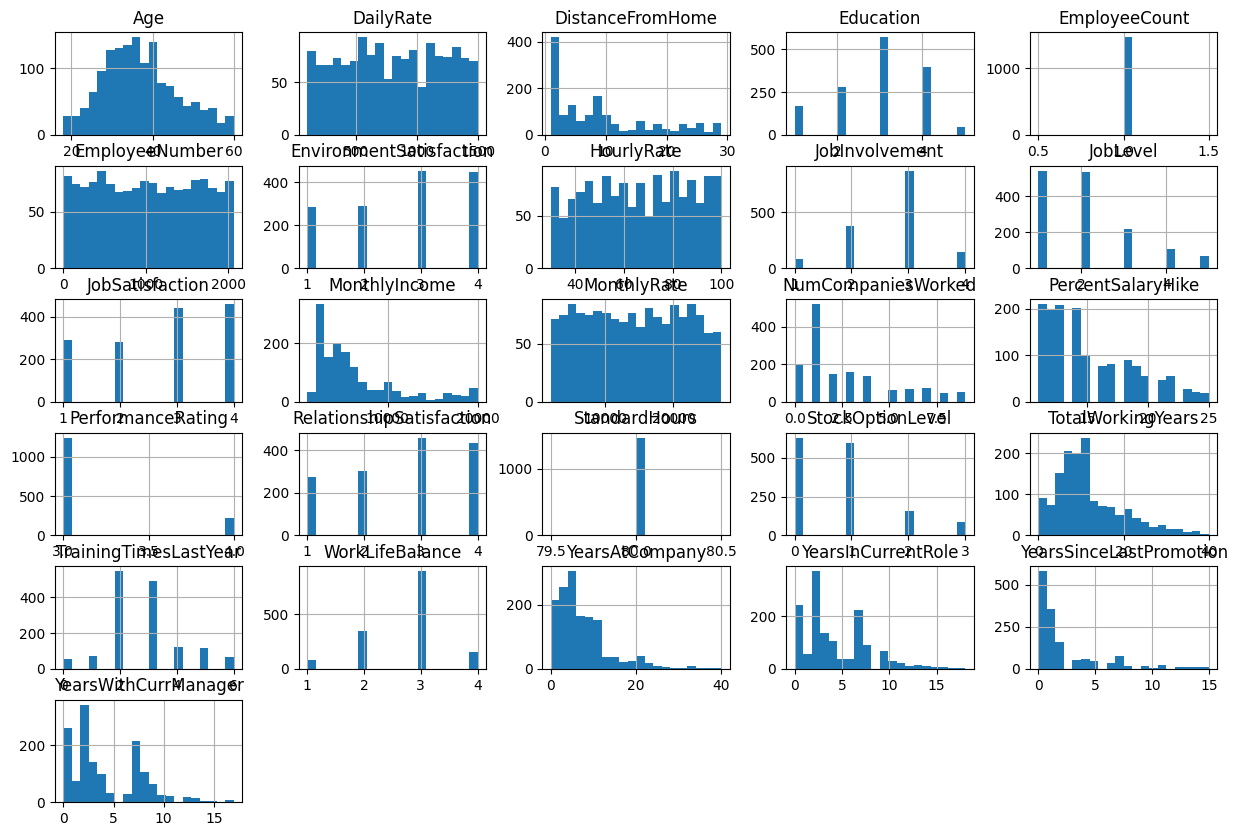

In [124]:
# Histograms of numerical variables
df.hist(bins=20, figsize=(15, 10))
plt.show()

<ipython-input-125-0c6446669d19>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


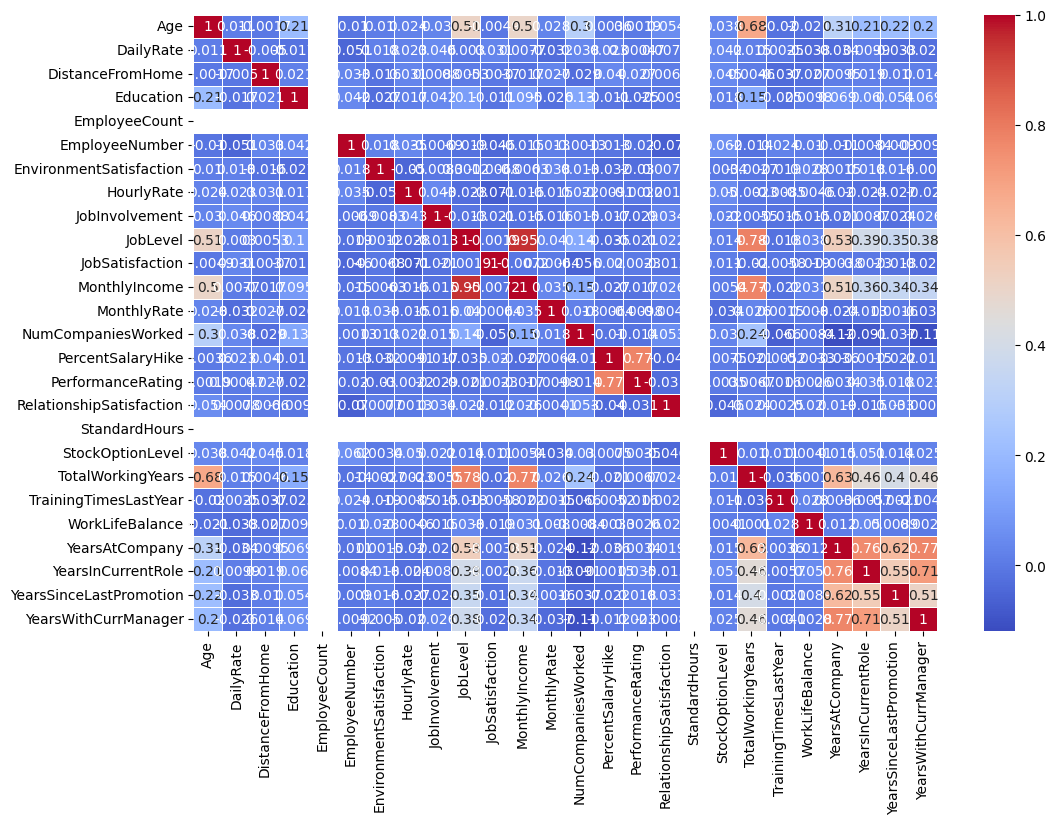

In [125]:
# Pairwise correlation heatmap
correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.show()

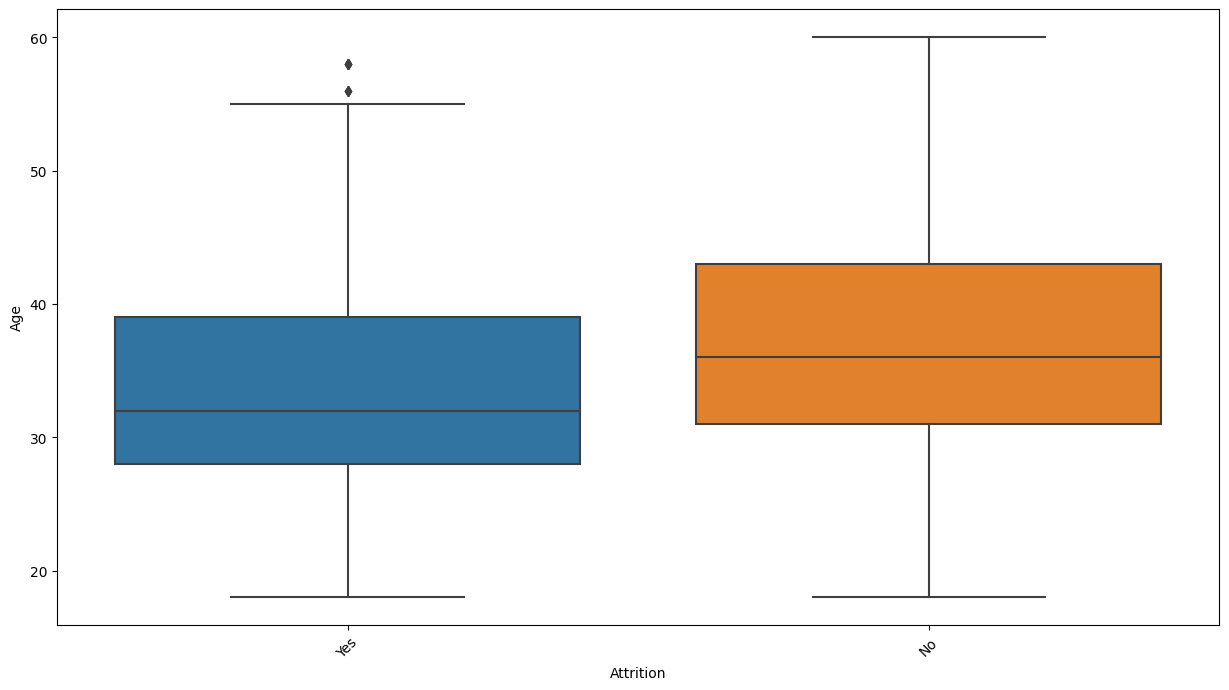

In [126]:
# Box plots to visualize the distribution of numerical variables
plt.figure(figsize=(15, 8))
sns.boxplot(x='Attrition', y='Age', data=df)
plt.xticks(rotation=45)
plt.show()

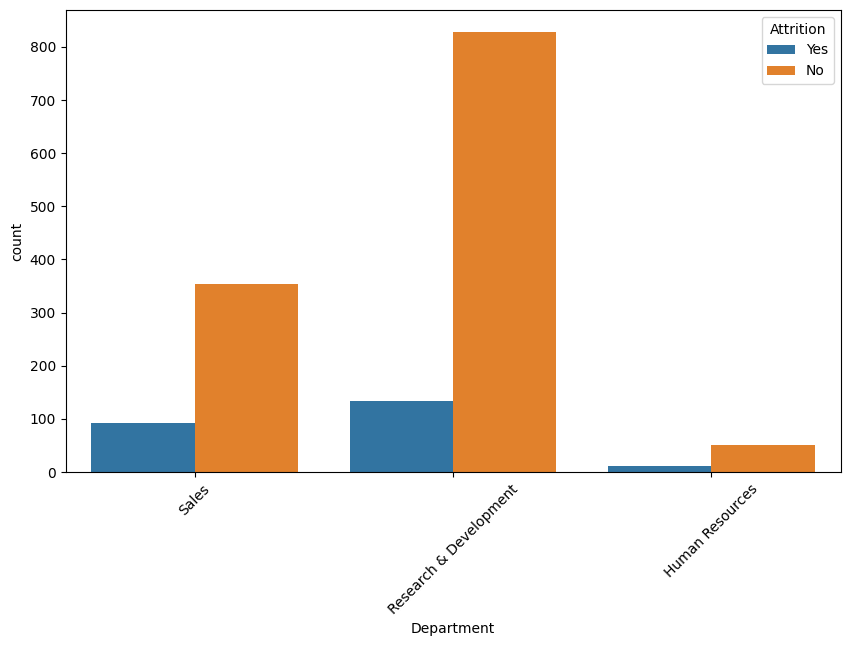

In [127]:
# Countplot for categorical variables
plt.figure(figsize=(10, 6))
sns.countplot(x='Department', data=df, hue='Attrition')
plt.xticks(rotation=45)
plt.show()

In [128]:
from scipy import stats

In [129]:
attrition_yes = df[df['Attrition'] == 'Yes']['Age']
attrition_no = df[df['Attrition'] == 'No']['Age']
t_stat, p_value = stats.ttest_ind(attrition_yes, attrition_no)
alpha = 0.05
if p_value < alpha:
    print("There is a significant difference in age between attrition and non-attrition groups.")
else:
    print("There is no significant difference in age between attrition and non-attrition groups.")

There is a significant difference in age between attrition and non-attrition groups.


In [130]:
from sklearn.linear_model import LinearRegression
# Define the independent variable (feature) and dependent variable (target)
X = df[['YearsAtCompany']]
y = df['MonthlyIncome']
model = LinearRegression()
model.fit(X, y)
coef = model.coef_
intercept = model.intercept_

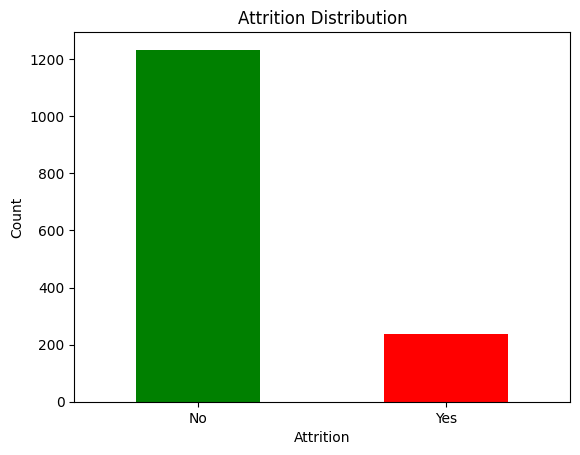

In [131]:
# Count the number of employees with and without attrition
attrition_counts = df['Attrition'].value_counts()

# Visualize the distribution with a bar plot
attrition_counts.plot(kind='bar', color=['green', 'red'])
plt.title('Attrition Distribution')
plt.xlabel('Attrition')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

In [132]:
#dailyRates
daily_rate_stats = df['DailyRate'].describe()
print(daily_rate_stats)

count    1470.000000
mean      802.485714
std       403.509100
min       102.000000
25%       465.000000
50%       802.000000
75%      1157.000000
max      1499.000000
Name: DailyRate, dtype: float64


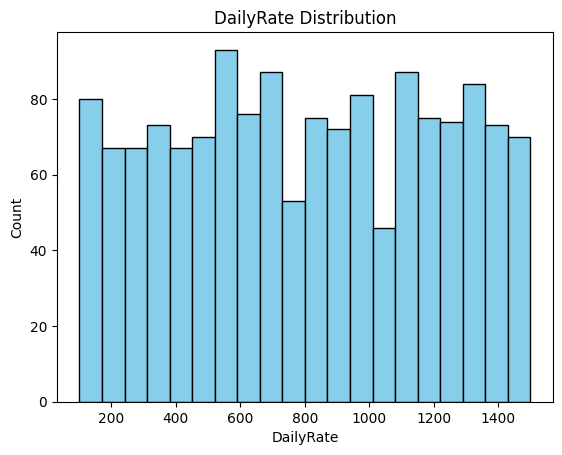

In [133]:
# Visualize the distribution of DailyRate
plt.hist(df['DailyRate'], bins=20, color='skyblue', edgecolor='black')
plt.title('DailyRate Distribution')
plt.xlabel('DailyRate')
plt.ylabel('Count')
plt.show()


In [134]:
# Group data by Department and calculate the mean DailyRate
department_daily_rate = df.groupby('Department')['DailyRate'].mean()
print(department_daily_rate)

# Explore how DailyRate varies by Education
education_daily_rate = df.groupby('Education')['DailyRate'].mean()
print(education_daily_rate)


Department
Human Resources           751.539683
Research & Development    806.851197
Sales                     800.275785
Name: DailyRate, dtype: float64
Education
1    822.417647
2    822.095745
3    781.800699
4    811.839196
5    785.625000
Name: DailyRate, dtype: float64


Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64


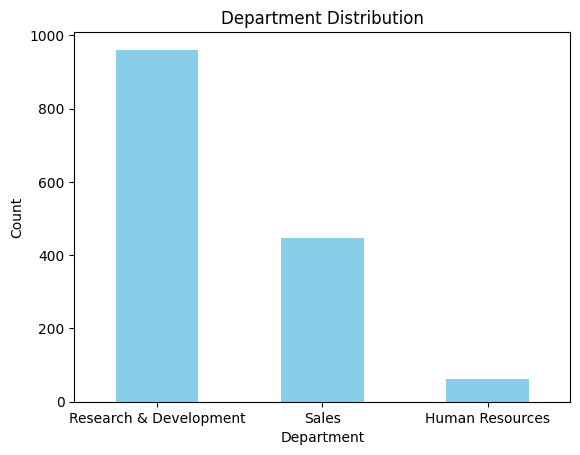

In [135]:
# Calculate the count of employees in each department
department_counts = df['Department'].value_counts()
print(department_counts)
# Visualize the distribution of employees in each department
department_counts.plot(kind='bar', color='skyblue')
plt.title('Department Distribution')
plt.xlabel('Department')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()


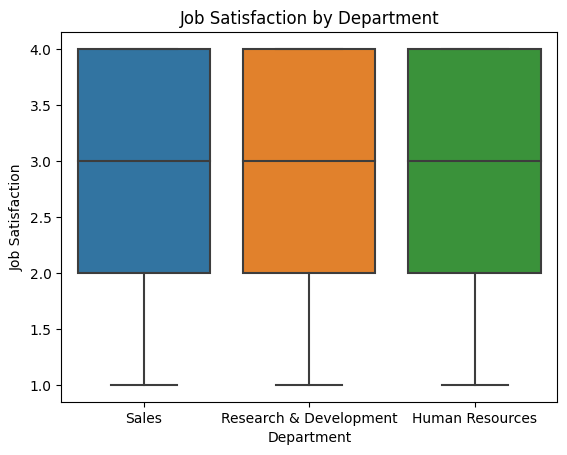

In [136]:
# Create box plots for JobSatisfaction by Department
sns.boxplot(data=df, x='Department', y='JobSatisfaction')
plt.title('Job Satisfaction by Department')
plt.xlabel('Department')
plt.ylabel('Job Satisfaction')
plt.xticks(rotation=0)
plt.show()


In [137]:
distance_stats = df['DistanceFromHome'].describe()
Q1 = np.percentile(df['DistanceFromHome'], 25)
Q3 = np.percentile(df['DistanceFromHome'], 75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
potential_outliers = df[(df['DistanceFromHome'] < lower_bound) | (df['DistanceFromHome'] > upper_bound)]

print("Descriptive Statistics:")
print(distance_stats)
print("\nPotential Outliers:")
print(potential_outliers)

Descriptive Statistics:
count    1470.000000
mean        9.192517
std         8.106864
min         1.000000
25%         2.000000
50%         7.000000
75%        14.000000
max        29.000000
Name: DistanceFromHome, dtype: float64

Potential Outliers:
Empty DataFrame
Columns: [Age, Attrition, BusinessTravel, DailyRate, Department, DistanceFromHome, Education, EducationField, EmployeeCount, EmployeeNumber, EnvironmentSatisfaction, Gender, HourlyRate, JobInvolvement, JobLevel, JobRole, JobSatisfaction, MaritalStatus, MonthlyIncome, MonthlyRate, NumCompaniesWorked, Over18, OverTime, PercentSalaryHike, PerformanceRating, RelationshipSatisfaction, StandardHours, StockOptionLevel, TotalWorkingYears, TrainingTimesLastYear, WorkLifeBalance, YearsAtCompany, YearsInCurrentRole, YearsSinceLastPromotion, YearsWithCurrManager]
Index: []

[0 rows x 35 columns]


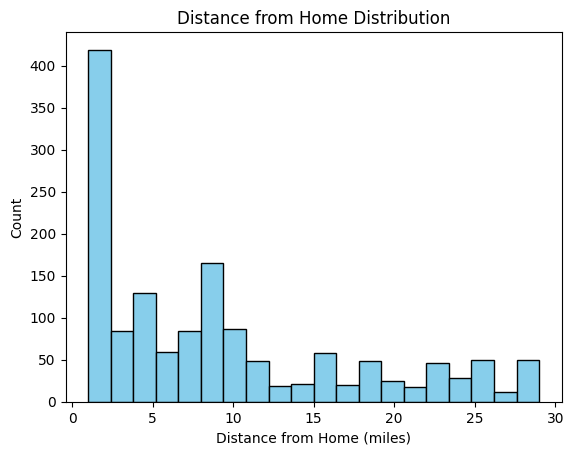

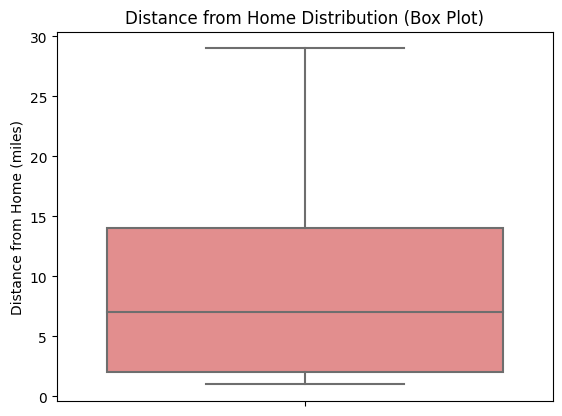

In [138]:
# Histogram
plt.hist(df['DistanceFromHome'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distance from Home Distribution')
plt.xlabel('Distance from Home (miles)')
plt.ylabel('Count')
plt.show()

# Box plot
sns.boxplot(data=df, y='DistanceFromHome', color='lightcoral')
plt.title('Distance from Home Distribution (Box Plot)')
plt.ylabel('Distance from Home (miles)')
plt.show()


In [139]:
# Group data by Attrition and calculate the mean distance from home
attrition_distance = df.groupby('Attrition')['DistanceFromHome'].mean()
print(attrition_distance)


Attrition
No      8.915653
Yes    10.632911
Name: DistanceFromHome, dtype: float64


In [140]:


# Split the data into two groups: attrition and no attrition
distance_attrition = df[df['Attrition'] == 'Yes']['DistanceFromHome']
distance_no_attrition = df[df['Attrition'] == 'No']['DistanceFromHome']

# Perform a t-test
t_stat, p_value = stats.ttest_ind(distance_attrition, distance_no_attrition)

# Set your significance level (alpha)
alpha = 1

if p_value < alpha:
    print("There is a significant difference in DistanceFromHome between attrition and non-attrition groups.")
else:
    print("There is no significant difference in DistanceFromHome between attrition and non-attrition groups.")


There is a significant difference in DistanceFromHome between attrition and non-attrition groups.


In [141]:
# Calculating descriptive statistics for Education
education_stats = df['Education'].describe()
print(education_stats)


count    1470.000000
mean        2.912925
std         1.024165
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max         5.000000
Name: Education, dtype: float64


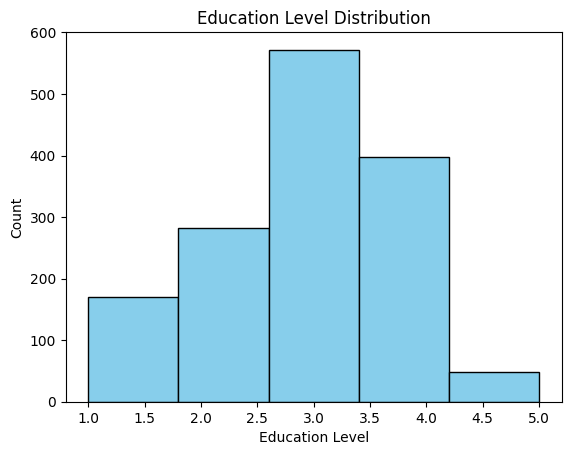

In [142]:
# Visualize the distribution of Education
plt.hist(df['Education'], bins=5, color='skyblue', edgecolor='black')
plt.title('Education Level Distribution')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.show()


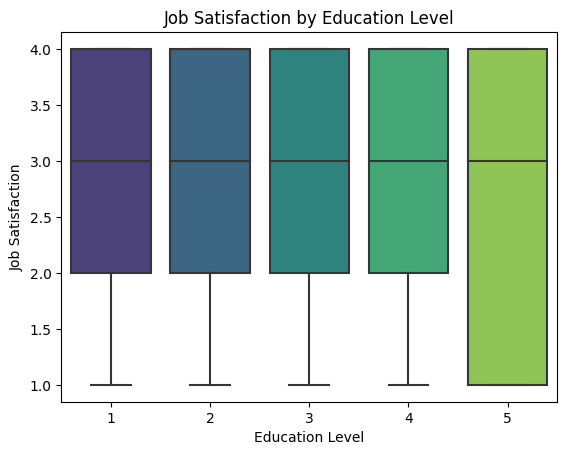

In [143]:
# Create a box plot for Education and JobSatisfaction
sns.boxplot(data=df, x='Education', y='JobSatisfaction', palette='viridis')
plt.title('Job Satisfaction by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Job Satisfaction')
plt.show()


In [144]:
from scipy.stats import f_oneway

# Group data by Education and calculate the mean JobSatisfaction
education_job_satisfaction = [df[df['Education'] == level]['JobSatisfaction'] for level in df['Education'].unique()]

# Perform ANOVA test
f_stat, p_value = f_oneway(*education_job_satisfaction)

# Set your significance level (alpha)
alpha = 0.05

if p_value < alpha:
    print("There is a significant difference in JobSatisfaction among different education levels.")
else:
    print("There is no significant difference in JobSatisfaction among different education levels.")


There is no significant difference in JobSatisfaction among different education levels.


In [145]:
# Calculate descriptive statistics for EducationField
education_field_stats = df['EducationField'].describe()
print(education_field_stats)


count              1470
unique                6
top       Life Sciences
freq                606
Name: EducationField, dtype: object


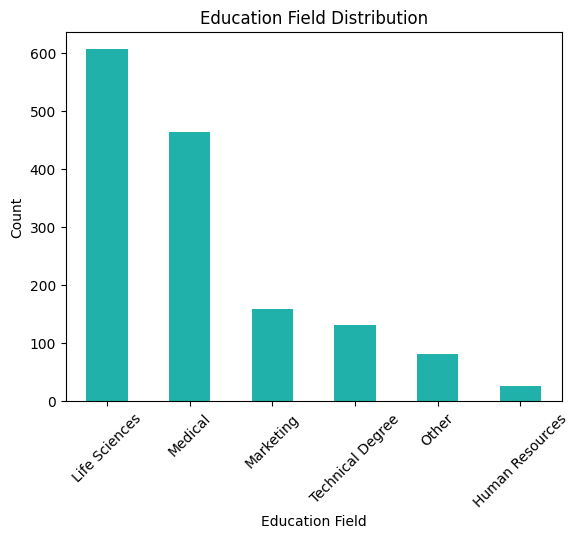

In [146]:
# Visualize the distribution of EducationField
education_field_counts = df['EducationField'].value_counts()
education_field_counts.plot(kind='bar', color='lightseagreen')
plt.title('Education Field Distribution')
plt.xlabel('Education Field')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


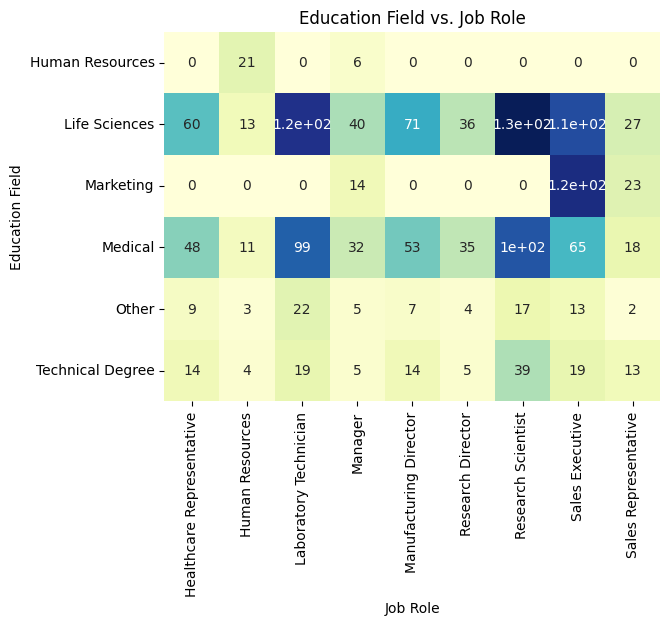

In [147]:
# Create a crosstab of EducationField and JobRole
cross_table = pd.crosstab(df['EducationField'], df['JobRole'])

# Create a heatmap to visualize the relationship
sns.heatmap(cross_table, cmap='YlGnBu', annot=True, cbar=False)
plt.title('Education Field vs. Job Role')
plt.xlabel('Job Role')
plt.ylabel('Education Field')
plt.xticks(rotation=90)
plt.show()


In [148]:
from scipy.stats import chi2_contingency

# Perform a chi-squared test
chi2, p, _, _ = chi2_contingency(cross_table)

# Set your significance level (alpha)
alpha = 0.05

if p < alpha:
    print("EducationField and JobRole are not independent.")
else:
    print("EducationField and JobRole are independent.")


EducationField and JobRole are not independent.


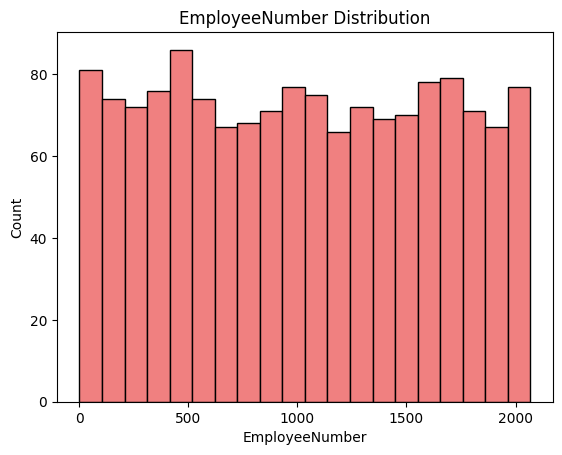

In [149]:
# Visualize the distribution of EmployeeNumber
plt.hist(df['EmployeeNumber'], bins=20, color='lightcoral', edgecolor='black')
plt.title('EmployeeNumber Distribution')
plt.xlabel('EmployeeNumber')
plt.ylabel('Count')
plt.show()


In [150]:
# Calculate descriptive statistics for EnvironmentSatisfaction
satisfaction_stats = df['EnvironmentSatisfaction'].describe()
print(satisfaction_stats)


count    1470.000000
mean        2.721769
std         1.093082
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max         4.000000
Name: EnvironmentSatisfaction, dtype: float64


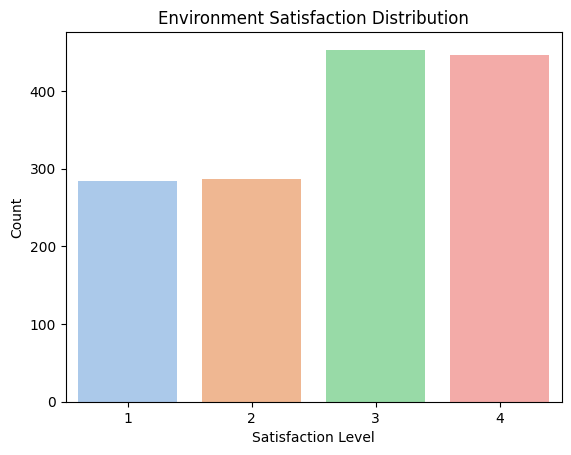

In [151]:
# Visualize the distribution of EnvironmentSatisfaction
sns.countplot(data=df, x='EnvironmentSatisfaction', palette='pastel')
plt.title('Environment Satisfaction Distribution')
plt.xlabel('Satisfaction Level')
plt.ylabel('Count')
plt.show()


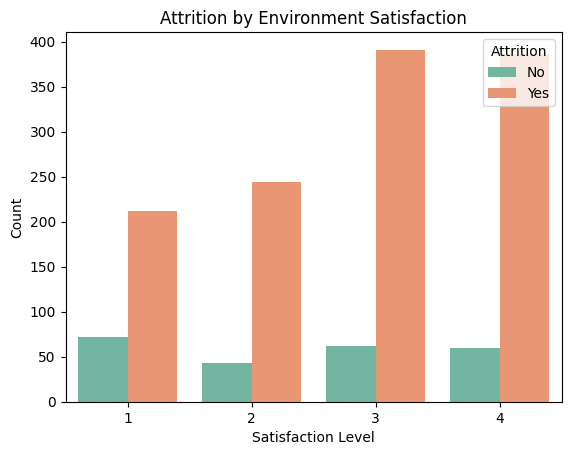

In [152]:
# Create a bar plot to compare attrition rates for each satisfaction level
sns.countplot(data=df, x='EnvironmentSatisfaction', hue='Attrition', palette='Set2')
plt.title('Attrition by Environment Satisfaction')
plt.xlabel('Satisfaction Level')
plt.ylabel('Count')
plt.legend(title='Attrition', loc='upper right', labels=['No', 'Yes'])
plt.show()


In [153]:
from scipy.stats import chi2_contingency

# Create a cross-tabulation of EnvironmentSatisfaction and Attrition
cross_table = pd.crosstab(df['EnvironmentSatisfaction'], df['Attrition'])

# Perform a chi-squared test
chi2, p, _, _ = chi2_contingency(cross_table)

# Set your significance level (alpha)
alpha = 0.05

if p < alpha:
    print("EnvironmentSatisfaction and Attrition are not independent.")
else:
    print("EnvironmentSatisfaction and Attrition are independent.")


EnvironmentSatisfaction and Attrition are not independent.


count     1470
unique       2
top       Male
freq       882
Name: Gender, dtype: object


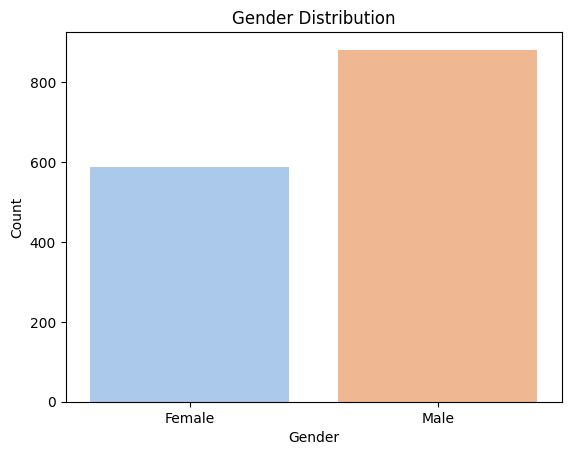

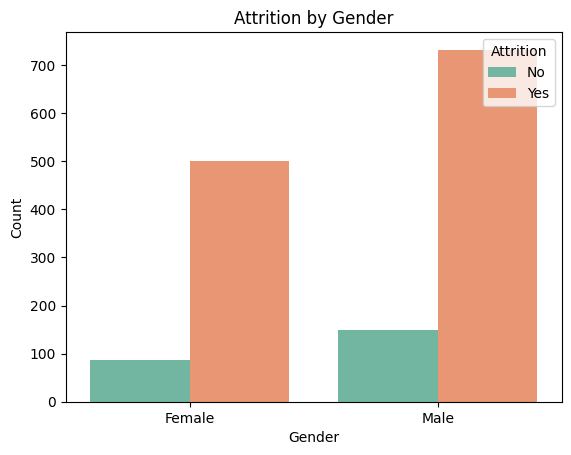

Gender and Attrition are independent.


In [154]:
# Calculate descriptive statistics for Gender
gender_stats = df['Gender'].describe()
print(gender_stats)
# Visualize the distribution of Gender
sns.countplot(data=df, x='Gender', palette='pastel')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()
# Create a bar plot to compare attrition rates by gender
sns.countplot(data=df, x='Gender', hue='Attrition', palette='Set2')
plt.title('Attrition by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Attrition', loc='upper right', labels=['No', 'Yes'])
plt.show()
from scipy.stats import chi2_contingency

# Create a cross-tabulation of Gender and Attrition
cross_table = pd.crosstab(df['Gender'], df['Attrition'])

# Perform a chi-squared test
chi2, p, _, _ = chi2_contingency(cross_table)

# Set your significance level (alpha)
alpha = 0.05

if p < alpha:
    print("Gender and Attrition are not independent.")
else:
    print("Gender and Attrition are independent.")



In [155]:
# Calculate descriptive statistics for HourlyRate
hourly_rate_stats = df['HourlyRate'].describe()
print(hourly_rate_stats)


count    1470.000000
mean       65.891156
std        20.329428
min        30.000000
25%        48.000000
50%        66.000000
75%        83.750000
max       100.000000
Name: HourlyRate, dtype: float64


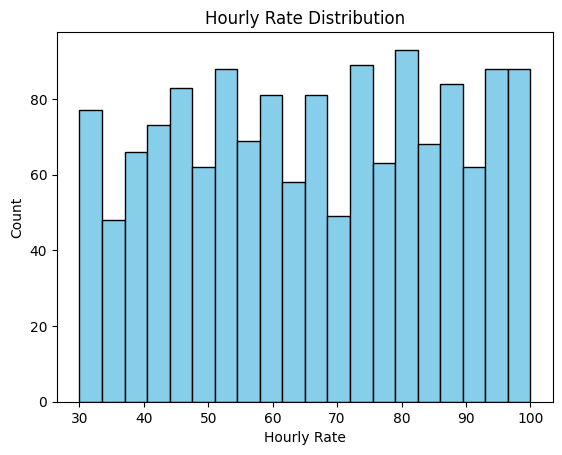

In [156]:
# Visualize the distribution of HourlyRate
plt.hist(df['HourlyRate'], bins=20, color='skyblue', edgecolor='black')
plt.title('Hourly Rate Distribution')
plt.xlabel('Hourly Rate')
plt.ylabel('Count')
plt.show()


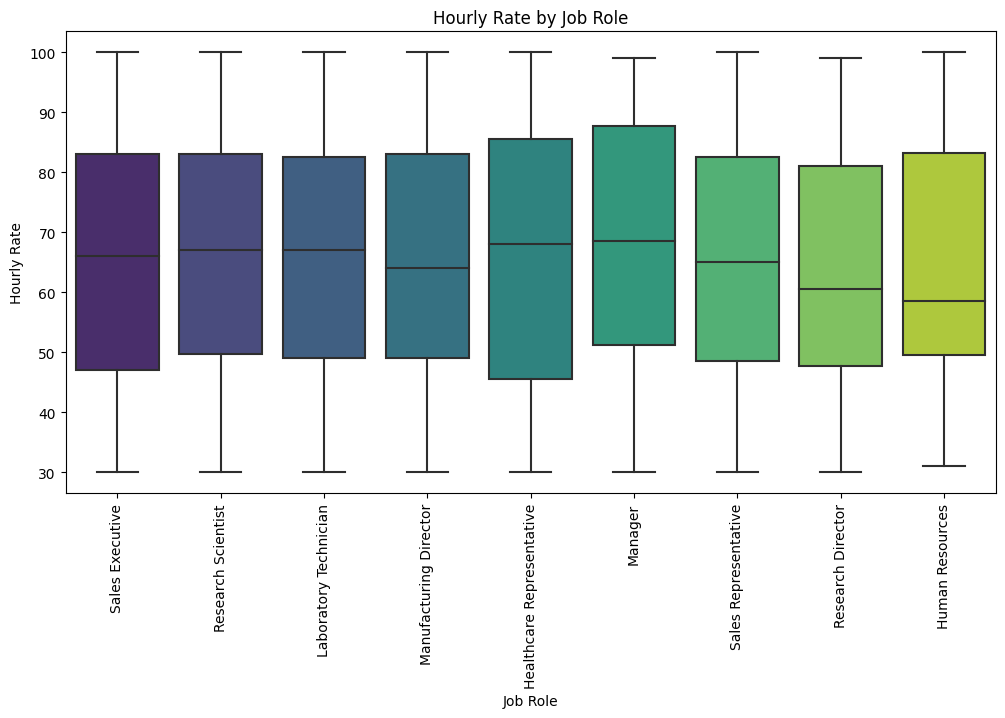

In [157]:
# Create a box plot for HourlyRate by JobRole
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='JobRole', y='HourlyRate', palette='viridis')
plt.title('Hourly Rate by Job Role')
plt.xlabel('Job Role')
plt.ylabel('Hourly Rate')
plt.xticks(rotation=90)
plt.show()


In [158]:
# Calculate descriptive statistics for JobInvolvement
job_involvement_stats = df['JobInvolvement'].describe()
print(job_involvement_stats)


count    1470.000000
mean        2.729932
std         0.711561
min         1.000000
25%         2.000000
50%         3.000000
75%         3.000000
max         4.000000
Name: JobInvolvement, dtype: float64


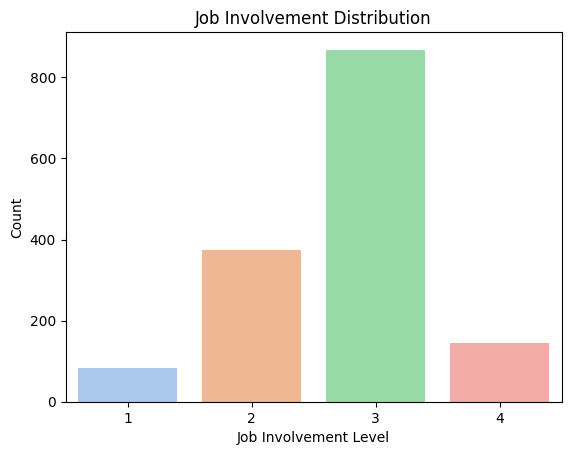

In [159]:
# Visualize the distribution of JobInvolvement
sns.countplot(data=df, x='JobInvolvement', palette='pastel')
plt.title('Job Involvement Distribution')
plt.xlabel('Job Involvement Level')
plt.ylabel('Count')
plt.show()


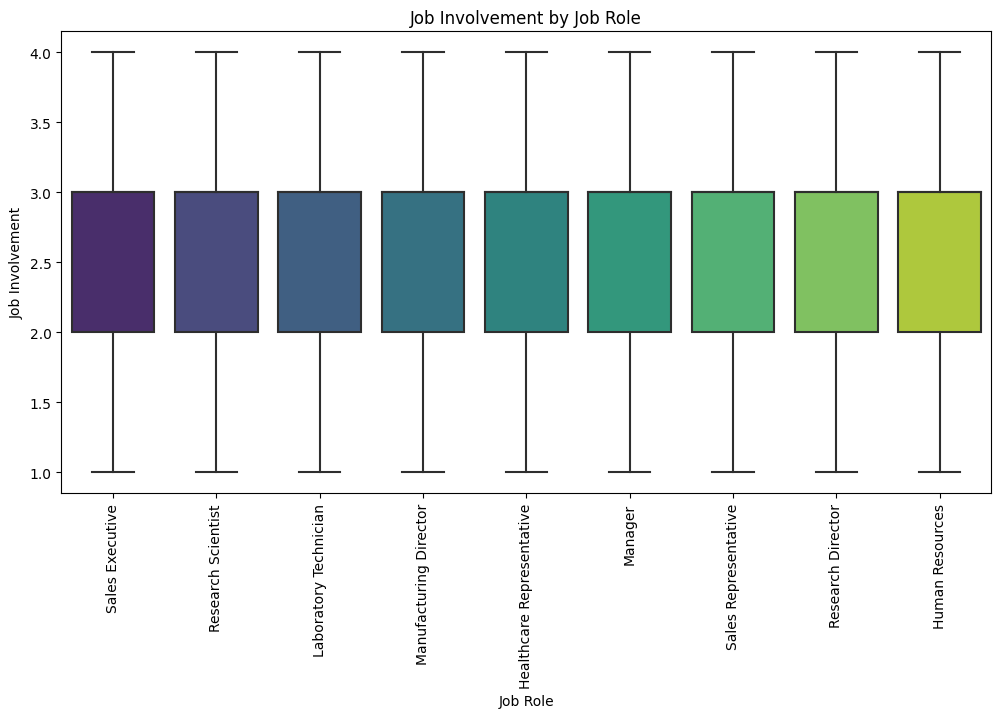

In [160]:
# Create a box plot for JobInvolvement by JobRole
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='JobRole', y='JobInvolvement', palette='viridis')
plt.title('Job Involvement by Job Role')
plt.xlabel('Job Role')
plt.ylabel('Job Involvement')
plt.xticks(rotation=90)
plt.show()


In [161]:
from scipy.stats import f_oneway

# Group data by JobRole and calculate the mean JobInvolvement
job_role_involvement = [df[df['JobRole'] == role]['JobInvolvement'] for role in df['JobRole'].unique()]

# Perform ANOVA test
f_stat, p_value = f_oneway(*job_role_involvement)

# Set your significance level (alpha)
alpha = 0.05

if p_value < alpha:
    print("There is a significant difference in JobInvolvement among different job roles.")
else:
    print("There is no significant difference in JobInvolvement among different job roles.")


There is no significant difference in JobInvolvement among different job roles.


In [162]:
# Calculate descriptive statistics for JobLevel
job_level_stats = df['JobLevel'].describe()
print(job_level_stats)


count    1470.000000
mean        2.063946
std         1.106940
min         1.000000
25%         1.000000
50%         2.000000
75%         3.000000
max         5.000000
Name: JobLevel, dtype: float64


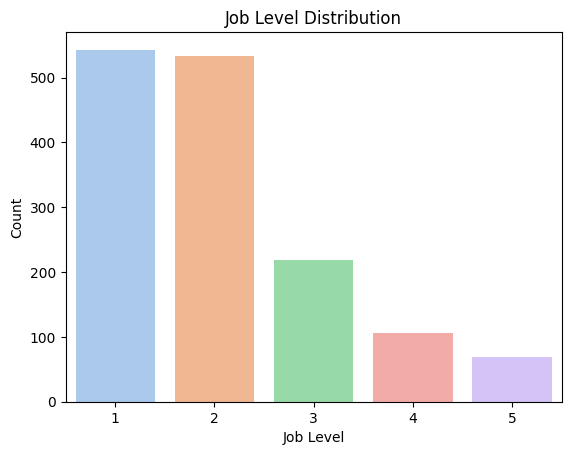

In [163]:
# Visualize the distribution of JobLevel
sns.countplot(data=df, x='JobLevel', palette='pastel')
plt.title('Job Level Distribution')
plt.xlabel('Job Level')
plt.ylabel('Count')
plt.show()


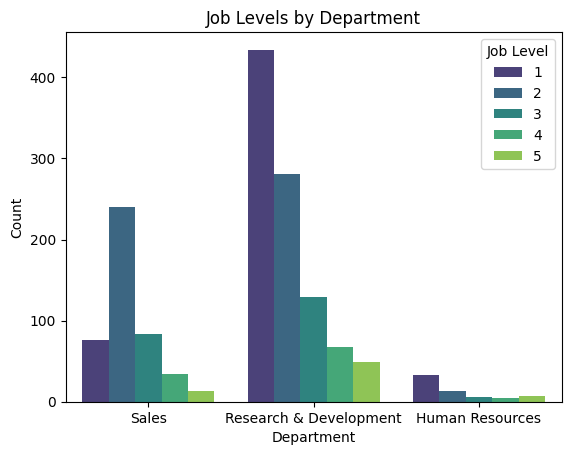

In [164]:
# Create a bar plot to compare job levels for each department
sns.countplot(data=df, x='Department', hue='JobLevel', palette='viridis')
plt.title('Job Levels by Department')
plt.xlabel('Department')
plt.ylabel('Count')
plt.legend(title='Job Level', loc='upper right')
plt.show()


In [165]:
from scipy.stats import chi2_contingency

# Create a cross-tabulation of JobLevel and Department
cross_table = pd.crosstab(df['JobLevel'], df['Department'])

# Perform a chi-squared test
chi2, p, _, _ = chi2_contingency(cross_table)

# Set your significance level (alpha)
alpha = 0.05

if p < alpha:
    print("JobLevel and Department are not independent.")
else:
    print("JobLevel and Department are independent.")


JobLevel and Department are not independent.


In [166]:
# Calculate descriptive statistics for JobRole
job_role_stats = df['JobRole'].describe()
print(job_role_stats)


count                1470
unique                  9
top       Sales Executive
freq                  326
Name: JobRole, dtype: object


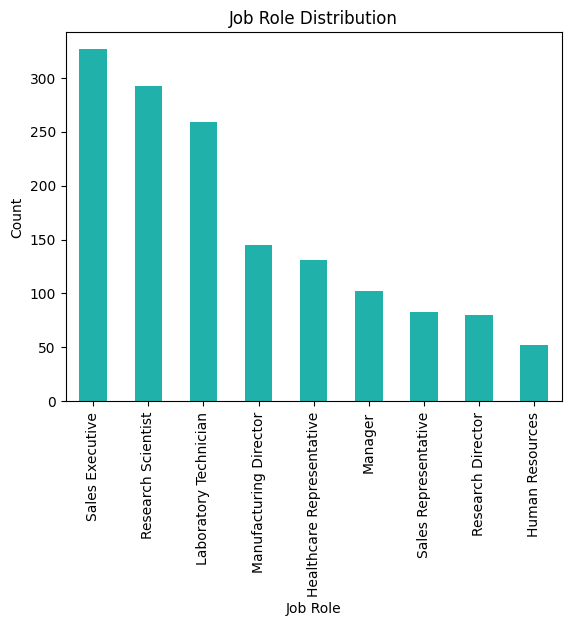

In [167]:
# Visualize the distribution of JobRole
job_role_counts = df['JobRole'].value_counts()
job_role_counts.plot(kind='bar', color='lightseagreen')
plt.title('Job Role Distribution')
plt.xlabel('Job Role')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()


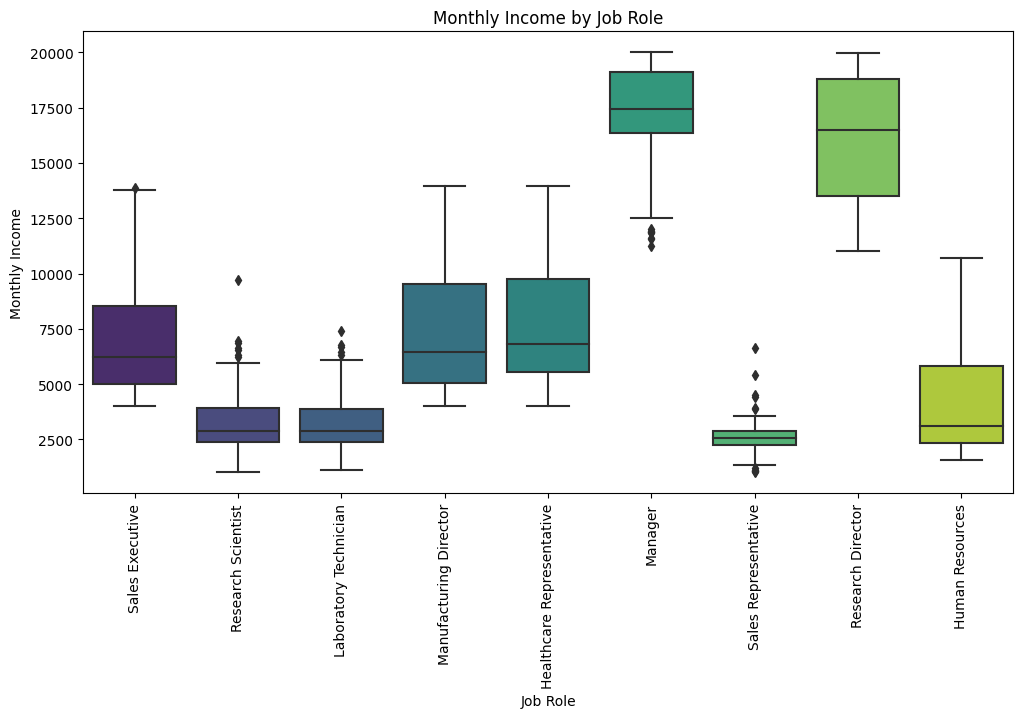

In [168]:
# Create a box plot for MonthlyIncome by JobRole
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='JobRole', y='MonthlyIncome', palette='viridis')
plt.title('Monthly Income by Job Role')
plt.xlabel('Job Role')
plt.ylabel('Monthly Income')
plt.xticks(rotation=90)
plt.show()


In [169]:
from scipy.stats import f_oneway

# Group data by JobRole and calculate the mean MonthlyIncome
job_role_income = [df[df['JobRole'] == role]['MonthlyIncome'] for role in df['JobRole'].unique()]

# Perform ANOVA test
f_stat, p_value = f_oneway(*job_role_income)

# Set your significance level (alpha)
alpha = 0.05

if p_value < alpha:
    print("There is a significant difference in MonthlyIncome among different job roles.")
else:
    print("There is no significant difference in MonthlyIncome among different job roles.")


There is a significant difference in MonthlyIncome among different job roles.


In [170]:
# Calculate descriptive statistics for JobSatisfaction
job_satisfaction_stats = df['JobSatisfaction'].describe()
print(job_satisfaction_stats)


count    1470.000000
mean        2.728571
std         1.102846
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max         4.000000
Name: JobSatisfaction, dtype: float64


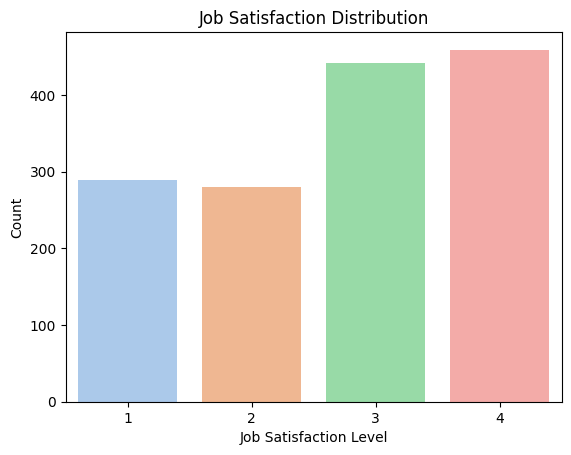

In [171]:
# Visualize the distribution of JobSatisfaction
sns.countplot(data=df, x='JobSatisfaction', palette='pastel')
plt.title('Job Satisfaction Distribution')
plt.xlabel('Job Satisfaction Level')
plt.ylabel('Count')
plt.show()


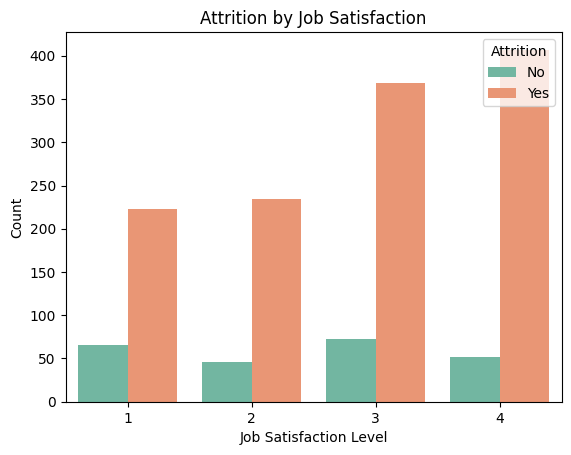

In [172]:
# Create a bar plot to compare attrition rates for each satisfaction level
sns.countplot(data=df, x='JobSatisfaction', hue='Attrition', palette='Set2')
plt.title('Attrition by Job Satisfaction')
plt.xlabel('Job Satisfaction Level')
plt.ylabel('Count')
plt.legend(title='Attrition', loc='upper right', labels=['No', 'Yes'])
plt.show()


In [173]:
from scipy.stats import chi2_contingency

# Create a cross-tabulation of JobSatisfaction and Attrition
cross_table = pd.crosstab(df['JobSatisfaction'], df['Attrition'])

# Perform a chi-squared test
chi2, p, _, _ = chi2_contingency(cross_table)

# Set your significance level (alpha)
alpha = 0.05

if p < alpha:
    print("JobSatisfaction and Attrition are not independent.")
else:
    print("JobSatisfaction and Attrition are independent.")


JobSatisfaction and Attrition are not independent.


In [174]:
# Calculate descriptive statistics for MaritalStatus
marital_status_stats = df['MaritalStatus'].describe()
print(marital_status_stats)


count        1470
unique          3
top       Married
freq          673
Name: MaritalStatus, dtype: object


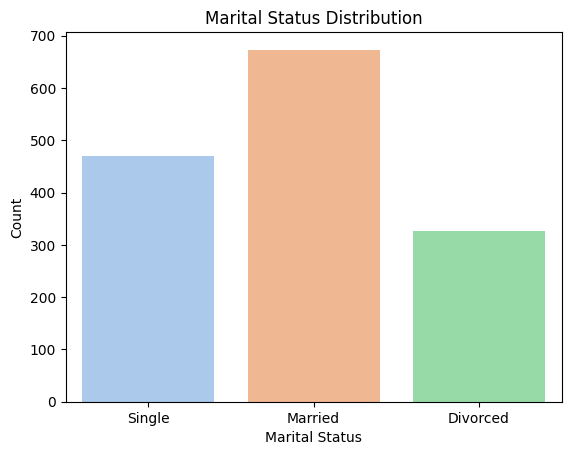

In [175]:
# Visualize the distribution of MaritalStatus
sns.countplot(data=df, x='MaritalStatus', palette='pastel')
plt.title('Marital Status Distribution')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.show()


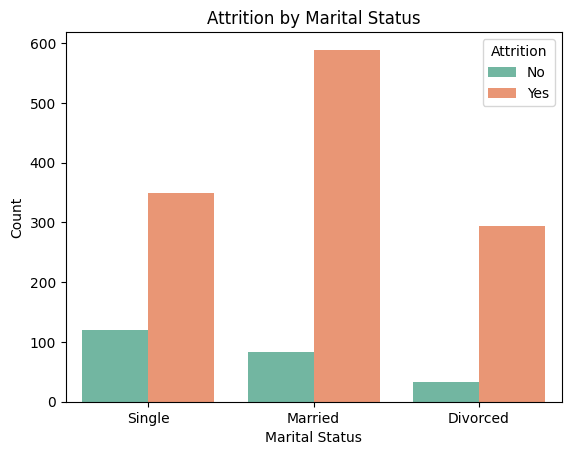

In [176]:
# Create a bar plot to compare attrition rates for each marital status
sns.countplot(data=df, x='MaritalStatus', hue='Attrition', palette='Set2')
plt.title('Attrition by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.legend(title='Attrition', loc='upper right', labels=['No', 'Yes'])
plt.show()


In [177]:
from scipy.stats import chi2_contingency

# Create a cross-tabulation of MaritalStatus and Attrition
cross_table = pd.crosstab(df['MaritalStatus'], df['Attrition'])

# Perform a chi-squared test
chi2, p, _, _ = chi2_contingency(cross_table)

# Set your significance level (alpha)
alpha = 0.05

if p < alpha:
    print("MaritalStatus and Attrition are not independent.")
else:
    print("MaritalStatus and Attrition are independent.")


MaritalStatus and Attrition are not independent.


In [178]:
# Calculate descriptive statistics for MonthlyIncome
monthly_income_stats = df['MonthlyIncome'].describe()
print(monthly_income_stats)


count     1470.000000
mean      6502.931293
std       4707.956783
min       1009.000000
25%       2911.000000
50%       4919.000000
75%       8379.000000
max      19999.000000
Name: MonthlyIncome, dtype: float64


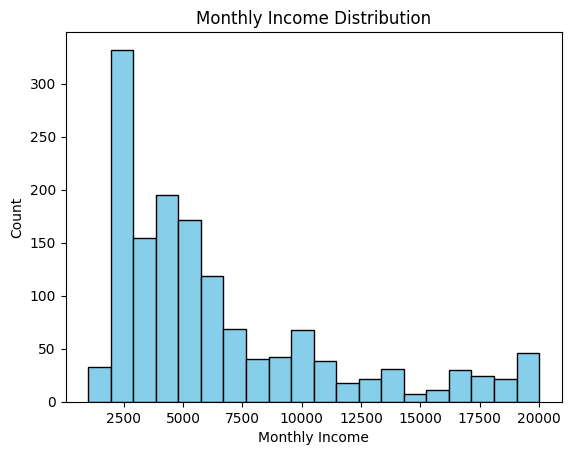

In [179]:
# Visualize the distribution of MonthlyIncome
plt.hist(df['MonthlyIncome'], bins=20, color='skyblue', edgecolor='black')
plt.title('Monthly Income Distribution')
plt.xlabel('Monthly Income')
plt.ylabel('Count')
plt.show()


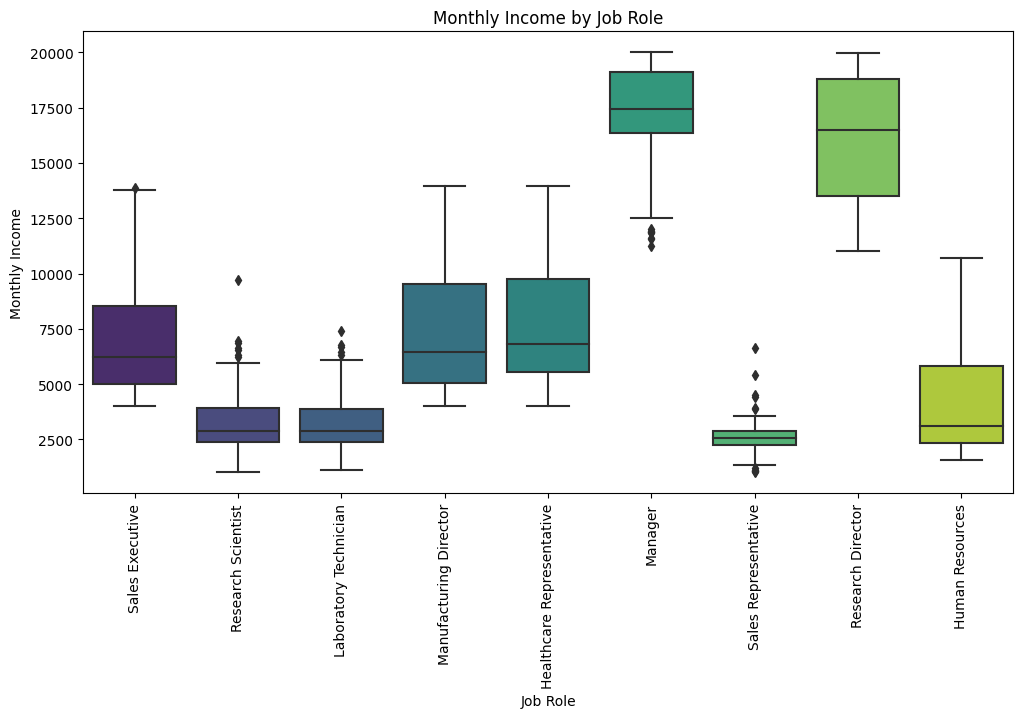

In [180]:
# Create a box plot for MonthlyIncome by JobRole
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='JobRole', y='MonthlyIncome', palette='viridis')
plt.title('Monthly Income by Job Role')
plt.xlabel('Job Role')
plt.ylabel('Monthly Income')
plt.xticks(rotation=90)
plt.show()


In [181]:
from scipy.stats import f_oneway

# Group data by JobRole and calculate the mean MonthlyIncome
job_role_income = [df[df['JobRole'] == role]['MonthlyIncome'] for role in df['JobRole'].unique()]

# Perform ANOVA test
f_stat, p_value = f_oneway(*job_role_income)

# Set your significance level (alpha)
alpha = 0.05

if p_value < alpha:
    print("There is a significant difference in MonthlyIncome among different job roles.")
else:
    print("There is no significant difference in MonthlyIncome among different job roles.")


There is a significant difference in MonthlyIncome among different job roles.


In [182]:
# Calculate descriptive statistics for NumCompaniesWorked
num_companies_stats = df['NumCompaniesWorked'].describe()
print(num_companies_stats)


count    1470.000000
mean        2.693197
std         2.498009
min         0.000000
25%         1.000000
50%         2.000000
75%         4.000000
max         9.000000
Name: NumCompaniesWorked, dtype: float64


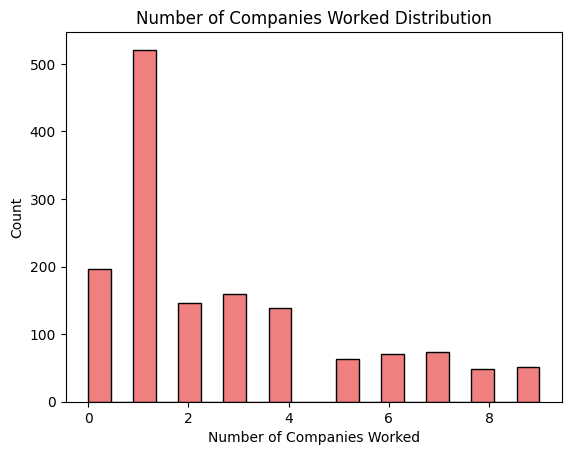

In [183]:
# Visualize the distribution of NumCompaniesWorked
plt.hist(df['NumCompaniesWorked'], bins=20, color='lightcoral', edgecolor='black')
plt.title('Number of Companies Worked Distribution')
plt.xlabel('Number of Companies Worked')
plt.ylabel('Count')
plt.show()


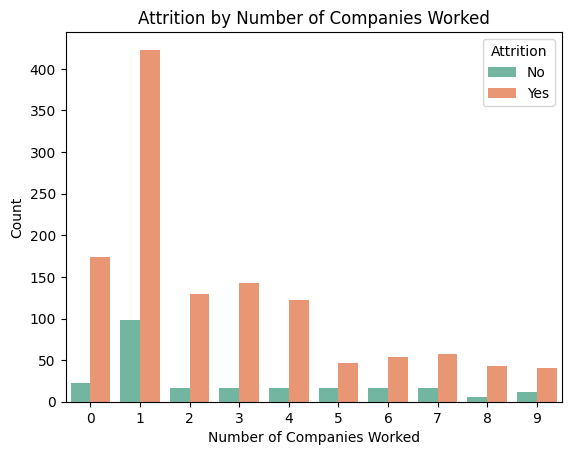

In [184]:
# Create a bar plot to compare attrition rates for different numbers of companies worked
sns.countplot(data=df, x='NumCompaniesWorked', hue='Attrition', palette='Set2')
plt.title('Attrition by Number of Companies Worked')
plt.xlabel('Number of Companies Worked')
plt.ylabel('Count')
plt.legend(title='Attrition', loc='upper right', labels=['No', 'Yes'])
plt.show()


In [185]:
from scipy.stats import ttest_ind

# Separate data into two groups: Attrition == 'Yes' and Attrition == 'No'
attrition_yes = df[df['Attrition'] == 'Yes']['NumCompaniesWorked']
attrition_no = df[df['Attrition'] == 'No']['NumCompaniesWorked']

# Perform an independent t-test
t_stat, p_value = ttest_ind(attrition_yes, attrition_no)

# Set your significance level (alpha)
alpha = 0.05

if p_value < alpha:
    print("There is a significant difference in the number of companies worked between attrited and non-attrited employees.")
else:
    print("There is no significant difference in the number of companies worked between attrited and non-attrited employees.")


There is no significant difference in the number of companies worked between attrited and non-attrited employees.


In [186]:
# Calculate descriptive statistics for Over18
over_18_stats = df['Over18'].describe()
print(over_18_stats)


count     1470
unique       1
top          Y
freq      1470
Name: Over18, dtype: object


In [187]:
# Calculate descriptive statistics for Over18
over_18_stats = df['Over18'].describe()
print(over_18_stats)


count     1470
unique       1
top          Y
freq      1470
Name: Over18, dtype: object


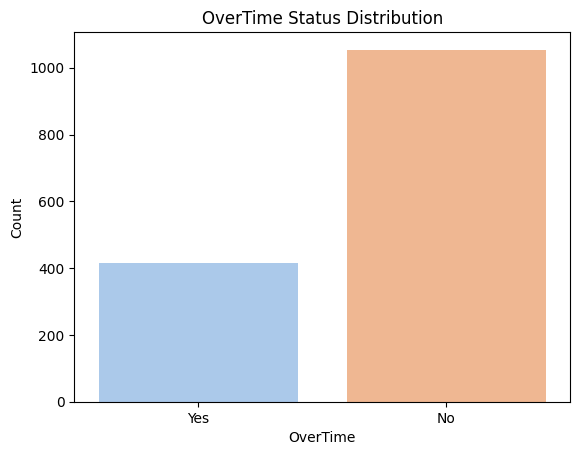

In [188]:
# Visualize the distribution of OverTime
sns.countplot(data=df, x='OverTime', palette='pastel')
plt.title('OverTime Status Distribution')
plt.xlabel('OverTime')
plt.ylabel('Count')
plt.show()


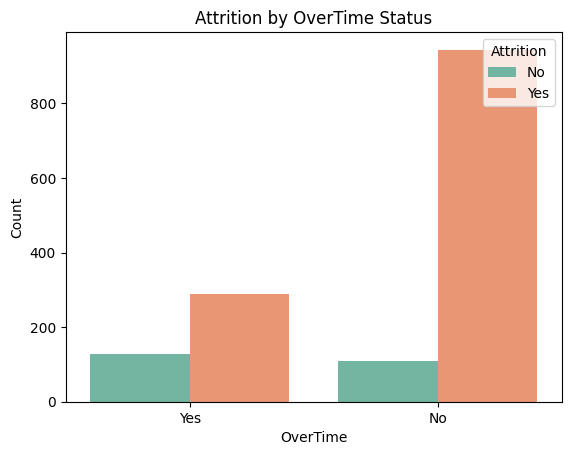

In [189]:
# Create a bar plot to compare attrition rates for each OverTime status
sns.countplot(data=df, x='OverTime', hue='Attrition', palette='Set2')
plt.title('Attrition by OverTime Status')
plt.xlabel('OverTime')
plt.ylabel('Count')
plt.legend(title='Attrition', loc='upper right', labels=['No', 'Yes'])
plt.show()


In [190]:
from scipy.stats import chi2_contingency

# Create a cross-tabulation of OverTime and Attrition
cross_table = pd.crosstab(df['OverTime'], df['Attrition'])

# Perform a chi-squared test
chi2, p, _, _ = chi2_contingency(cross_table)

# Set your significance level (alpha)
alpha = 0.05

if p < alpha:
    print("OverTime and Attrition are not independent.")
else:
    print("OverTime and Attrition are independent.")


OverTime and Attrition are not independent.


In [191]:
# Calculate descriptive statistics for PercentSalaryHike
percent_salary_hike_stats = df['PercentSalaryHike'].describe()
print(percent_salary_hike_stats)


count    1470.000000
mean       15.209524
std         3.659938
min        11.000000
25%        12.000000
50%        14.000000
75%        18.000000
max        25.000000
Name: PercentSalaryHike, dtype: float64


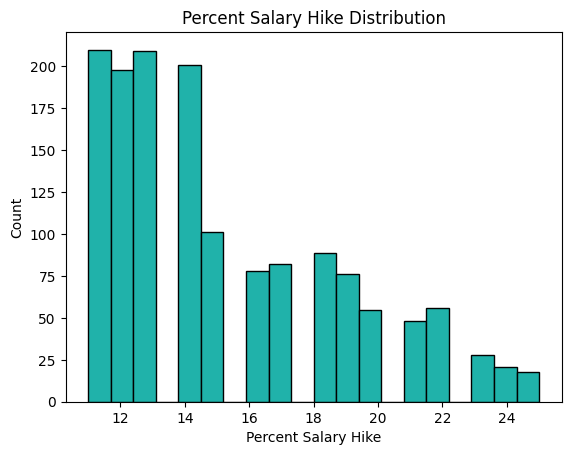

In [192]:
# Visualize the distribution of PercentSalaryHike
plt.hist(df['PercentSalaryHike'], bins=20, color='lightseagreen', edgecolor='black')
plt.title('Percent Salary Hike Distribution')
plt.xlabel('Percent Salary Hike')
plt.ylabel('Count')
plt.show()


In [193]:
from scipy.stats import ttest_ind

# Separate data into two groups: Attrition == 'Yes' and Attrition == 'No'
attrition_yes = df[df['Attrition'] == 'Yes']['PercentSalaryHike']
attrition_no = df[df['Attrition'] == 'No']['PercentSalaryHike']

# Perform an independent t-test
t_stat, p_value = ttest_ind(attrition_yes, attrition_no)

# Set your significance level (alpha)
alpha = 0.05

if p_value < alpha:
    print("There is a significant difference in PercentSalaryHike between attrited and non-attrited employees.")
else:
    print("There is no significant difference in PercentSalaryHike between attrited and non-attrited employees.")


There is no significant difference in PercentSalaryHike between attrited and non-attrited employees.


In [194]:
# Calculate descriptive statistics for StandardHours
standard_hours_stats = df['StandardHours'].describe()
print(standard_hours_stats)


count    1470.0
mean       80.0
std         0.0
min        80.0
25%        80.0
50%        80.0
75%        80.0
max        80.0
Name: StandardHours, dtype: float64


In [195]:
# Calculate descriptive statistics for StockOptionLevel
stock_option_stats = df['StockOptionLevel'].describe()
print(stock_option_stats)


count    1470.000000
mean        0.793878
std         0.852077
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         3.000000
Name: StockOptionLevel, dtype: float64


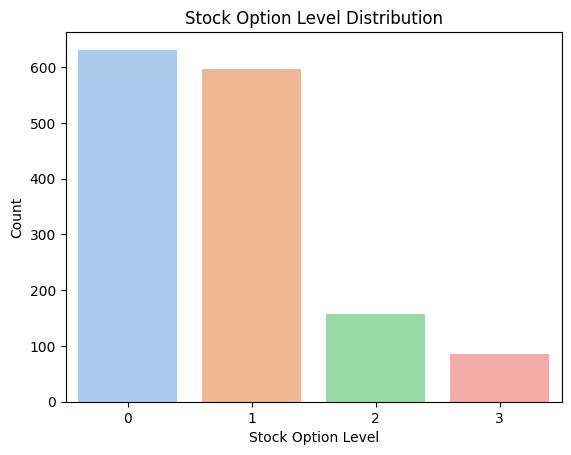

In [196]:
# Visualize the distribution of StockOptionLevel
sns.countplot(data=df, x='StockOptionLevel', palette='pastel')
plt.title('Stock Option Level Distribution')
plt.xlabel('Stock Option Level')
plt.ylabel('Count')
plt.show()


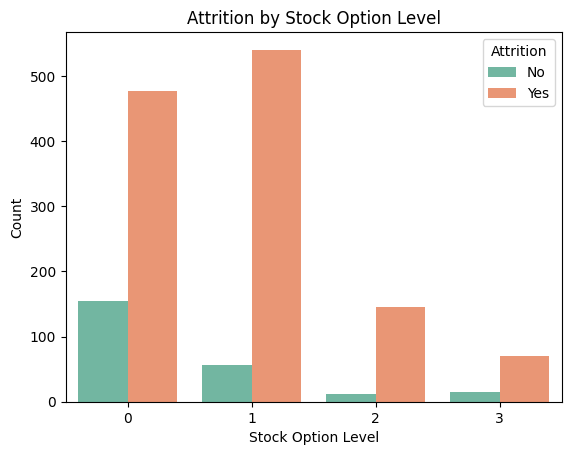

In [197]:
# Create a bar plot to compare attrition rates for each StockOptionLevel
sns.countplot(data=df, x='StockOptionLevel', hue='Attrition', palette='Set2')
plt.title('Attrition by Stock Option Level')
plt.xlabel('Stock Option Level')
plt.ylabel('Count')
plt.legend(title='Attrition', loc='upper right', labels=['No', 'Yes'])
plt.show()


In [198]:
from scipy.stats import chi2_contingency

# Create a cross-tabulation of StockOptionLevel and Attrition
cross_table = pd.crosstab(df['StockOptionLevel'], df['Attrition'])

# Perform a chi-squared test
chi2, p, _, _ = chi2_contingency(cross_table)

# Set your significance level (alpha)
alpha = 0.05

if p < alpha:
    print("StockOptionLevel and Attrition are not independent.")
else:
    print("StockOptionLevel and Attrition are independent.")


StockOptionLevel and Attrition are not independent.


In [199]:
# Calculate descriptive statistics for TotalWorkingYears
total_working_years_stats = df['TotalWorkingYears'].describe()
print(total_working_years_stats)


count    1470.000000
mean       11.279592
std         7.780782
min         0.000000
25%         6.000000
50%        10.000000
75%        15.000000
max        40.000000
Name: TotalWorkingYears, dtype: float64


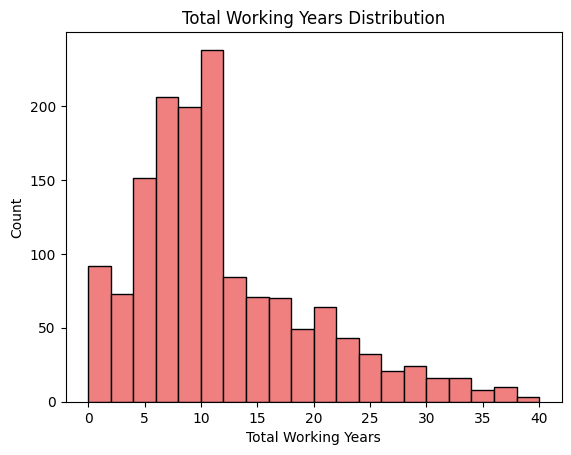

In [200]:
# Visualize the distribution of TotalWorkingYears
plt.hist(df['TotalWorkingYears'], bins=20, color='lightcoral', edgecolor='black')
plt.title('Total Working Years Distribution')
plt.xlabel('Total Working Years')
plt.ylabel('Count')
plt.show()


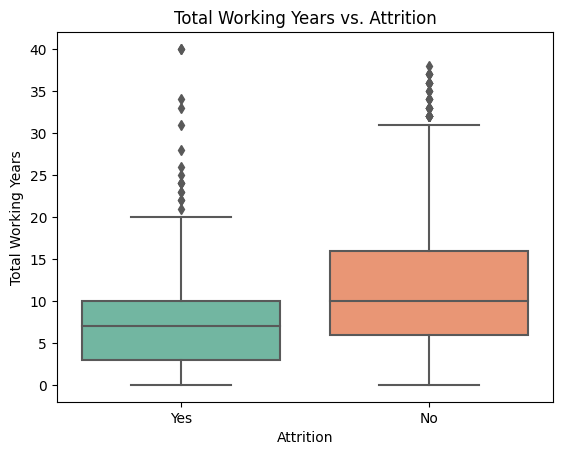

In [201]:
# Create a box plot to compare TotalWorkingYears for each Attrition group
sns.boxplot(data=df, x='Attrition', y='TotalWorkingYears', palette='Set2')
plt.title('Total Working Years vs. Attrition')
plt.xlabel('Attrition')
plt.ylabel('Total Working Years')
plt.show()


In [202]:
from scipy.stats import ttest_ind

# Separate data into two groups: Attrition == 'Yes' and Attrition == 'No'
attrition_yes = df[df['Attrition'] == 'Yes']['TotalWorkingYears']
attrition_no = df[df['Attrition'] == 'No']['TotalWorkingYears']

# Perform an independent t-test
t_stat, p_value = ttest_ind(attrition_yes, attrition_no)

# Set your significance level (alpha)
alpha = 0.05

if p_value < alpha:
    print("There is a significant difference in TotalWorkingYears between attrited and non-attrited employees.")
else:
    print("There is no significant difference in TotalWorkingYears between attrited and non-attrited employees.")


There is a significant difference in TotalWorkingYears between attrited and non-attrited employees.


In [203]:
# Calculate descriptive statistics for TrainingTimesLastYear
training_times_stats = df['TrainingTimesLastYear'].describe()
print(training_times_stats)


count    1470.000000
mean        2.799320
std         1.289271
min         0.000000
25%         2.000000
50%         3.000000
75%         3.000000
max         6.000000
Name: TrainingTimesLastYear, dtype: float64


In [204]:
# Calculate descriptive statistics for TrainingTimesLastYear
training_times_stats = df['TrainingTimesLastYear'].describe()
print(training_times_stats)


count    1470.000000
mean        2.799320
std         1.289271
min         0.000000
25%         2.000000
50%         3.000000
75%         3.000000
max         6.000000
Name: TrainingTimesLastYear, dtype: float64


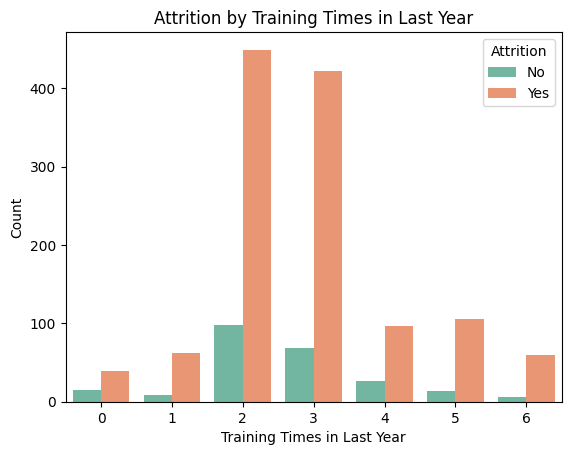

In [205]:
# Create a bar plot to compare attrition rates for each TrainingTimesLastYear
sns.countplot(data=df, x='TrainingTimesLastYear', hue='Attrition', palette='Set2')
plt.title('Attrition by Training Times in Last Year')
plt.xlabel('Training Times in Last Year')
plt.ylabel('Count')
plt.legend(title='Attrition', loc='upper right', labels=['No', 'Yes'])
plt.show()


In [206]:
from scipy.stats import chi2_contingency

# Create a cross-tabulation of TrainingTimesLastYear and Attrition
cross_table = pd.crosstab(df['TrainingTimesLastYear'], df['Attrition'])

# Perform a chi-squared test
chi2, p, _, _ = chi2_contingency(cross_table)

# Set your significance level (alpha)
alpha = 0.05

if p < alpha:
    print("TrainingTimesLastYear and Attrition are not independent.")
else:
    print("TrainingTimesLastYear and Attrition are independent.")


TrainingTimesLastYear and Attrition are not independent.
